<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/DART_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install darts

     |████████████████████████████████| 253 kB 13.6 MB/s 
     |████████████████████████████████| 9.9 MB 74.3 MB/s 
     |████████████████████████████████| 155 kB 64.2 MB/s 
     |████████████████████████████████| 177 kB 47.0 MB/s 
     |████████████████████████████████| 788 kB 62.8 MB/s 
     |████████████████████████████████| 28.5 MB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 10.3 MB 44.4 MB/s 
     |████████████████████████████████| 1.4 MB 38.4 MB/s 
     |████████████████████████████████| 9.5 MB 42.3 MB/s 
     |████████████████████████████████| 804.1 MB 3.0 kB/s 
     |████████████████████████████████| 2.0 MB 57.2 MB/s 
     |████████████████████████████████| 62 kB 456 kB/s 
     |████████████████████████████████| 370 kB 76.3 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 214 kB 92.5 MB/s 
  Created wheel fo

In [9]:
from darts.datasets import AirPassengersDataset,MonthlyMilkDataset
import pandas as pd

import matplotlib.pyplot as plt
serries_air=AirPassengersDataset().load()
serries_milk=MonthlyMilkDataset().load()

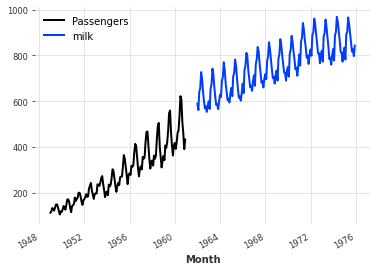

In [13]:
serries_air.plot(label='Passengers')
serries_milk.plot(label='milk')

In [18]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import gaussian_timeseries,linear_timeseries,sine_timeseries
from darts.models import RNNModel,TCNModel,TransformerModel,NBEATSModel,BlockRNNModel
from darts.metrics import mape, smape
from sklearn.preprocessing import StandardScaler




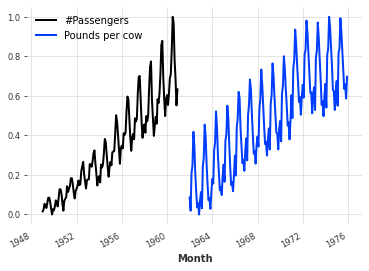

In [21]:
scaler_air=Scaler()
scaler_milk=Scaler()
serries_milk=scaler_milk.fit_transform(serries_milk)
serries_air=scaler_air.fit_transform(serries_air)
serries_air.plot()
serries_milk.plot()

In [23]:
train_air,val_air=serries_air[:36], serries_air[36:]
train_milk,val_milk=serries_milk[:36],serries_milk[36:]

In [26]:

#first 24 input and output is 12 and then next 24 input and then output 12
model_air_milk=NBEATSModel(input_chunk_length=24,output_chunk_length=12,n_epochs=100,random_state=0)
model_air_milk.fit([train_air,train_milk],verbose=True)

[2021-10-01 21:53:40,397] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2 samples.
[2021-10-01 21:53:40,397] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2 samples.
[2021-10-01 21:53:40,470] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-01 21:53:40,470] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:00<00:46,  2.13it/s]

 11%|█         | 11/100 [00:06<01:12,  1.22it/s]

 21%|██        | 21/100 [00:19<01:47,  1.36s/it]

 31%|███       | 31/100 [00:31<01:27,  1.27s/it]

 41%|████      | 41/100 [00:43<01:13,  1.25s/it]

 51%|█████     | 51/100 [00:56<01:02,  1.28s/it]

 61%|██████    | 61/100 [01:08<00:44,  1.15s/it]

 71%|███████   | 71/100 [01:21<00:35,  1.24s/it]

 81%|████████  | 81/100 [01:33<00:23,  1.21s/it]

 91%|█████████ | 91/100 [01:45<00:10,  1.20s/it]

100%|██████████| 100/100 [01:57<00:00,  1.17s/it]


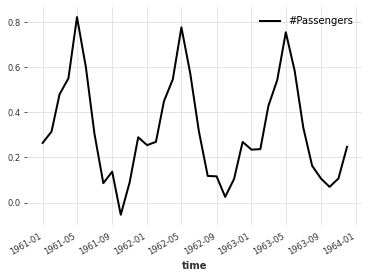

In [33]:
predicts=model_air_milk.predict(n=36,series=train_air)

#serries_air[:36].plot(label='actual')
#predicts.plot()
predicts_test=model_air_milk.predict(n=36,series=val_air)
predicts_test.plot()